**<span style="color:#448844">Note</span>** This notebook is meant to be interactive. Launch this notebook in Jupyter to see its full potential.

Name: Kyle Adrian Santos

Section: S12

# Support Vector Machines Exercise
This exercise will guide you in implementing Support Vector Machines (SVM). At the end, you will also see the effect of hyperparameters on your model.

## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with "A: " on them. The answer must strictly consume one line only.
* You are expected to search how to some functions work on the Internet or via the docs. 
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You are expected to understand the data set loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

# Creating an SVM model

## Generating a linearly separable dataset
Let's create a linearly separable dataset before we get to more difficult datasets.

Shape of X (100, 2)
Shape of y (100,)


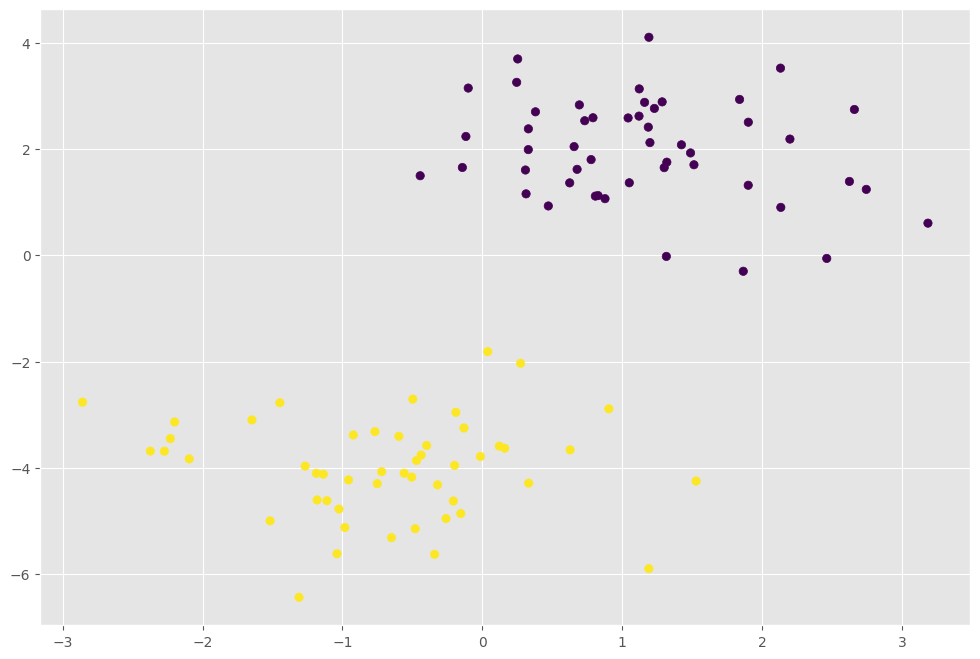

In [2]:
from sklearn.datasets import make_blobs
np.random.seed(1)
centers = [[1, 2], [-1, -4]]
X, y = make_blobs(n_samples=100, centers=centers)
y[y == 0] = -1
plt.scatter(X[:,0], X[:,1],c=y)
print("Shape of X",X.shape)
print("Shape of y", y.shape)

## Train an SVM model
We will use `sklearn`'s `SVC` model from the `svm` package.

In [3]:
# TODO : Use a linear kernel for this model
### START CODE HERE ###
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

predictions = clf.predict(X)

accuracy = clf.score(X, y)

print("Accuracy : ", accuracy)
### END CODE HERE ###

Accuracy :  1.0


**Sanity Check:** This is a linearly separable data, so linear kernel should get a 100% accuracy here.

## Visualize our model
Let's try to visualize the decision boundary and the margin

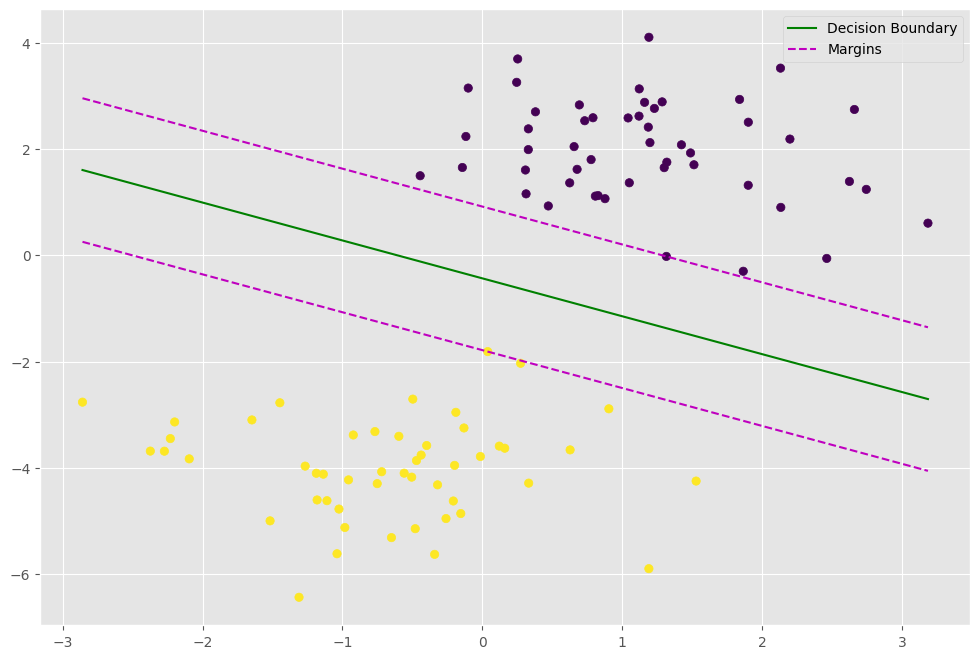

In [4]:

# TODO : Get the bias from the model
### START CODE HERE ###
b = clf.intercept_[0]
### END CODE HERE ###

# TODO : Get the weights
### START CODE HERE ###
W = clf.coef_[0]
### END CODE HERE ###

plt.scatter(X[:,0], X[:,1],c=y)
# plot decision boundary for 2D case
x_1 = np.min(X[:,0])
y_1 = (-b - W[0]*x_1) / W[1]
x_2 = np.max(X[:,0])
y_2 = (-b - W[0]*x_2) / W[1]

plt.plot([x_1, x_2], [y_1, y_2],'g',label="Decision Boundary")

# plot margins
x_1_a = np.min(X[:,0])
y_1_a = (1 - b - W[0]*x_1) / W[1]
x_2_a = np.max(X[:,0])
y_2_a = (1 - b - W[0]*x_2) / W[1]
plt.plot([x_1_a, x_2_a], [y_1_a, y_2_a],'--m')

x_1_b = np.min(X[:,0])
y_1_b = (-1 - b - W[0]*x_1) / W[1]
x_2_b = np.max(X[:,0])
y_2_b = (-1 - b - W[0]*x_2) / W[1]
plt.plot([x_1_b, x_2_b], [y_1_b, y_2_b],'--m', label="Margins")
plt.legend()

**Sanity Check:** You should see the boundary (green line) clearly cutting the data with a large margin on either side.

## Support vectors
From the lecture, we learned that SVM retains the training instances which "define" the boundary and uses them to predict the new instance's class. Let's see those training instances which SVMs refer to as **support vectors**.

In [5]:
# TODO : Get the number of support vectors in the model
### START CODE HERE ###
print(clf.n_support_)
### END CODE HERE ###

[1 1]


**Sanity Check:** You should see an array of two numbers. The numbers will tell you the number of support vectors for both classes.

In [6]:
# TODO : Get the actual support (training instance) vectors 
### START CODE HERE ###
print(clf.support_vectors_)
### END CODE HERE ###

[[ 1.31563495 -0.02220122]
 [ 0.0388246  -1.81302035]]


**Sanity Check:** You should see the coordinates/feature values of the chosen support vectors. Verify their positions in the visualizations above. They should be the nearest points to the boundary.

____

# Different kernels
We can extend SVM's to produce non-linear decision boundaries through kernels. This is similar to the feature transform that you did for the polynomial regression. The difference is that kernels gives you a way to get the same output without explicitly performing the feature transform (which may be expensive to compute specially for very high dimensional transforms). It can even represent an infinite dimensional transform such as the Gaussian / Radial Basis Function (RBF) kernel which in theory can linearly separate any data. However, without proper tuning and regularization, we risk overfitting to the training data which makes your classifier useless since it cannot generalize to unseen data.

To apply kernels, we simply replace all instances of the inner product $\langle \cdot,\cdot \rangle$ with the kernel $K(\cdot,\cdot)$. Note that $W = \sum_{i=1}^N \alpha_i y_i x_i$, which implies that $f(z) = W^Tz+b = \sum_{i=1}^N \alpha_i y_i \langle x_i, z\rangle +b$. So you will need to modify the some of the functions to apply the kernel.

Some commonly used kernels:

- Gaussian / Radial Basis Function (RBF) Kernel: $K(x,z) = \exp \bigl( -\frac{\Vert x-z \Vert^2}{2\sigma^2}\bigr)$
- Polynomial kernel: $K(x,z) = (x^Tz+c)^d$. Where $d$ is the degree of the polynomial and $c$ is a hyperparameter set by the user

## Radial Basis Function
### Generating a non-linearly separable dataset

Shape of X (200, 2)
Shape of y (200,)


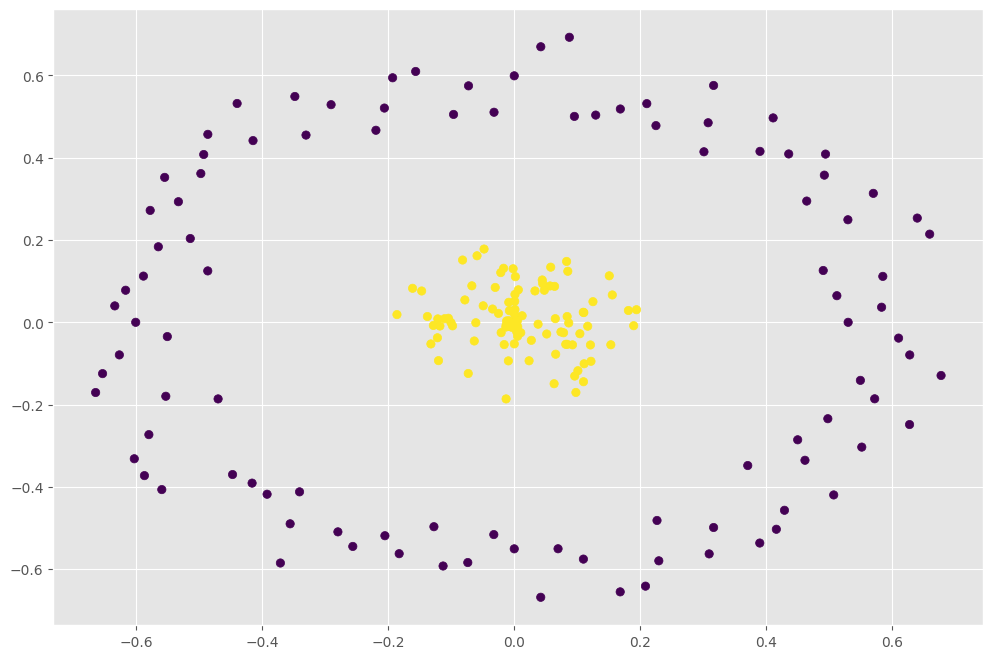

In [8]:
def generate_dummy_circle_data(num_points):
    r = np.random.uniform(0,0.2,num_points)
    theta = np.random.uniform(0,2*np.pi,num_points)
    inner_circle = np.array([r*np.sin(theta), r*np.cos(theta)]).T
    
    r = np.random.uniform(0.5,0.7,num_points)
    theta = 2*np.pi*np.arange(num_points)/num_points
    outer_circle = np.array([r*np.sin(theta), r*np.cos(theta)]).T

    X = np.concatenate((inner_circle,outer_circle),axis=0)
    y = np.concatenate((np.ones(num_points),-np.ones(num_points)),axis=0)
    
    randIdx = np.arange(X.shape[0])
    np.random.shuffle(randIdx)
    
    X = X[randIdx]
    y = y[randIdx].astype(int)
    
    return X, y

X,y = generate_dummy_circle_data(100)

print("Shape of X", X.shape)
print("Shape of y", y.shape)

plt.scatter(X[:,0],X[:,1],c=y)

### Train model
This data can be easily separated using an RBF kernel. 

In [9]:
# TODO : Create a model with an RBF kernel. Leave the gamma parameters as is for now.
### START CODE HERE ###
from sklearn import svm

clf = svm.SVC(kernel="rbf")
clf.fit(X, y)

predictions = clf.predict(X)

accuracy = clf.score(X, y)

print("Accuracy", accuracy)
### END CODE HERE ###

Accuracy 1.0


**Sanity check:** Using an RBF here will give you a perfect accuracy.

### Visualize

(-0.8683378787383591, 0.8927897661086472)

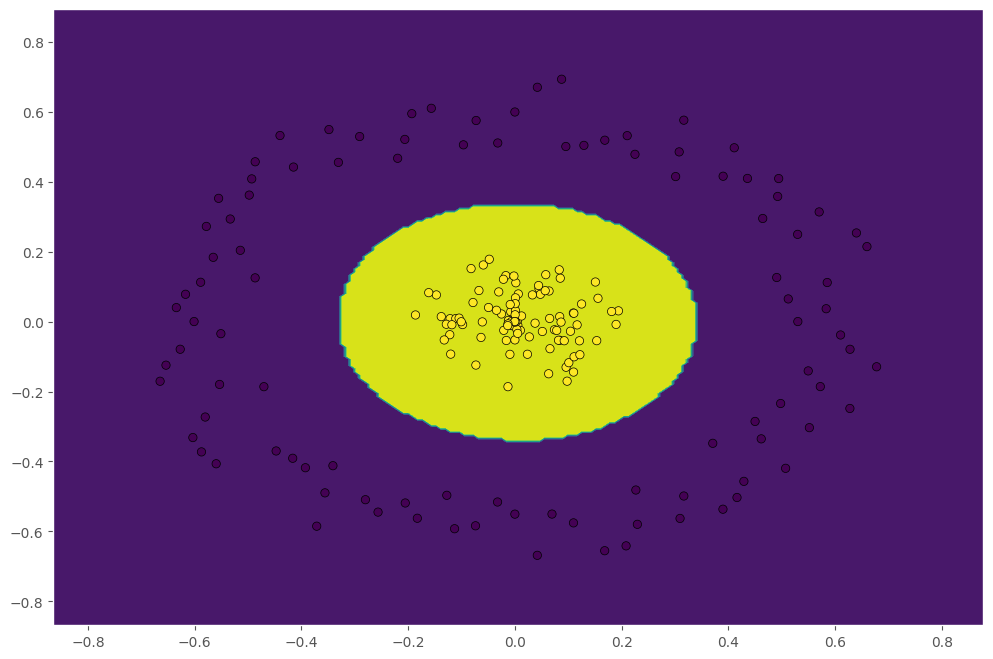

In [10]:
# visualize the decision boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))


x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T

Z = clf.predict(x_test)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

**Sanity Check:** You should see the data cropped in the middle, separating the classes from each other.

## Polynomial kernels

### Generating a dataset
The following cell just creates a dataset that we know is non-linearly separable.

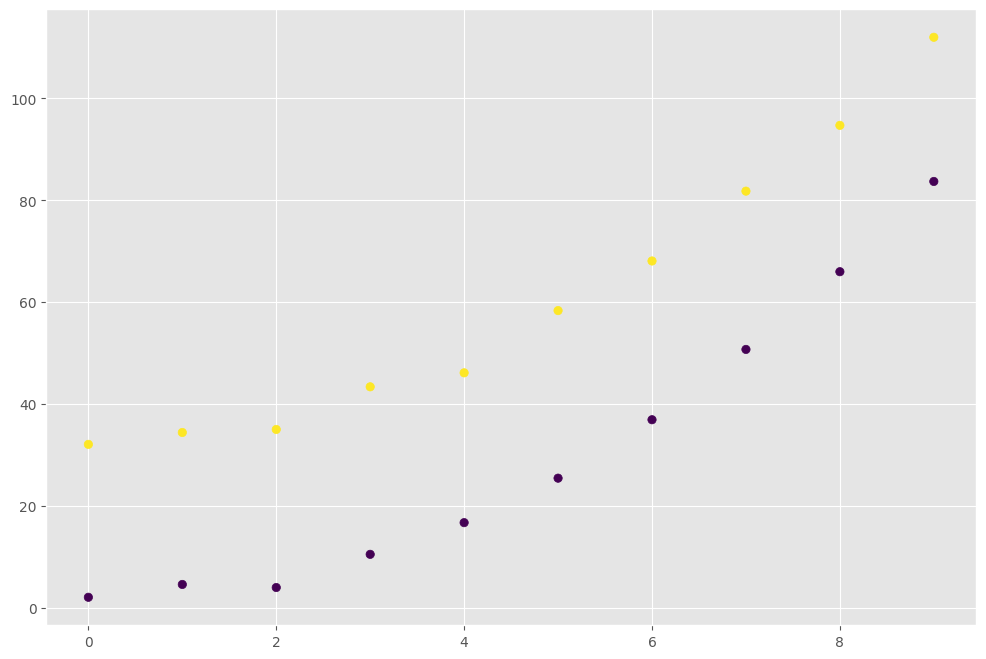

In [19]:
np.random.seed(1)

y1 = [val**2 + np.random.random()*5 for val in np.arange(0,10,1)]
y2 = [val**2 + np.random.random()*5 + 30 for val in np.arange(0,10,1)]

X = np.zeros((2*10,2))
X[:,0] = np.append(np.arange(0,10,1),np.arange(0,10,1))
X[:,1] = np.append(y1,y2)

y = np.zeros((2*10,))
y[0:10] = -1
y[10:20] = 1


plt.scatter(X[:,0],X[:,1],c=y)

### Using a polynomial kernel
The visualization above is a clear indicator that the data cannot be separated by a line (you can veri

In [39]:
# TODO : Train a model with a polynomial kernel. Give it a polynomial degree of 3
### START CODE HERE ###
from sklearn import svm

clf = svm.SVC(kernel="poly", degree=3, coef0=1.0, C=5.0)
clf.fit(X, y)
### END CODE HERE ###

,C,5.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,1.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Visualize

1.0

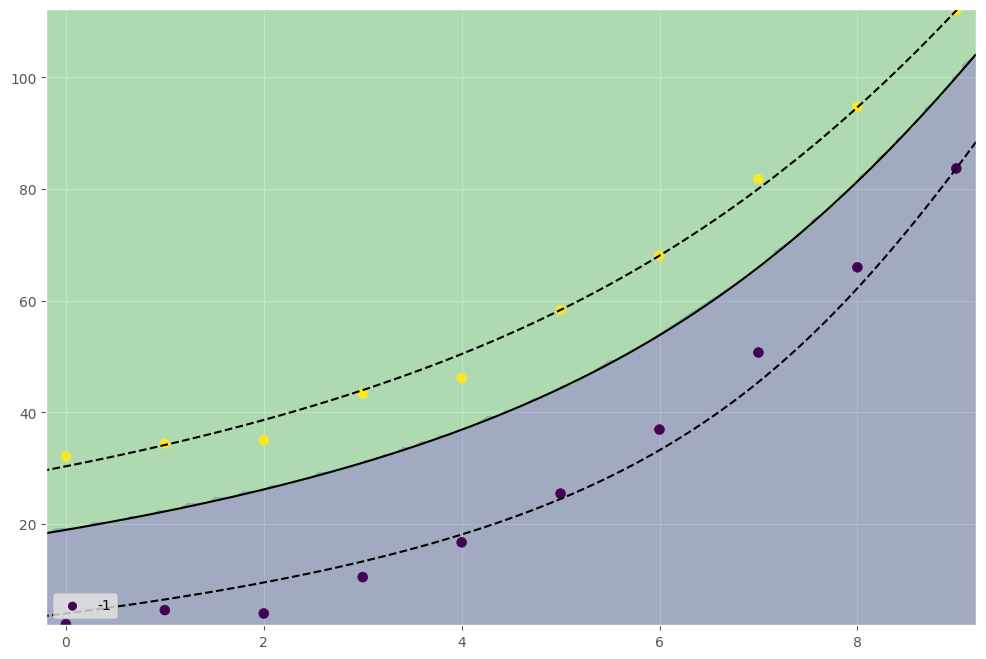

In [40]:
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
# [lbX1,ubX1,lbX2,ubX2]

idxPlus=y[y<0]
idxMin=y[y>0]

plt.scatter(X[:,0],X[:,1],c=y)
plt.legend(["-1","1"],loc=3)

X2,Y2 = np.mgrid[x_min:x_max:100j,y_min:y_max:100j]
# Since we are already applying some kind of transform, we cannot just get the W and the bias like before
# Here we are going to call the SVM classifier's decision_function to give us the results
Z = clf.decision_function(np.c_[X2.ravel(),Y2.ravel()])
Z = Z.reshape(X2.shape)
plt.contourf(X2,Y2,Z > 0,alpha=0.4)

plt.contour(X2,Y2,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X[:,0],X[:,1],c=y,s=50,alpha=0.95);

clf.score(X,y)

___

# Hyperparameter Tuning

Before we proceed to tuning our $\gamma$ and $C$ values, let's create a dataset for these experiments 

Shape of X (30, 2)
Shape of y (30,)


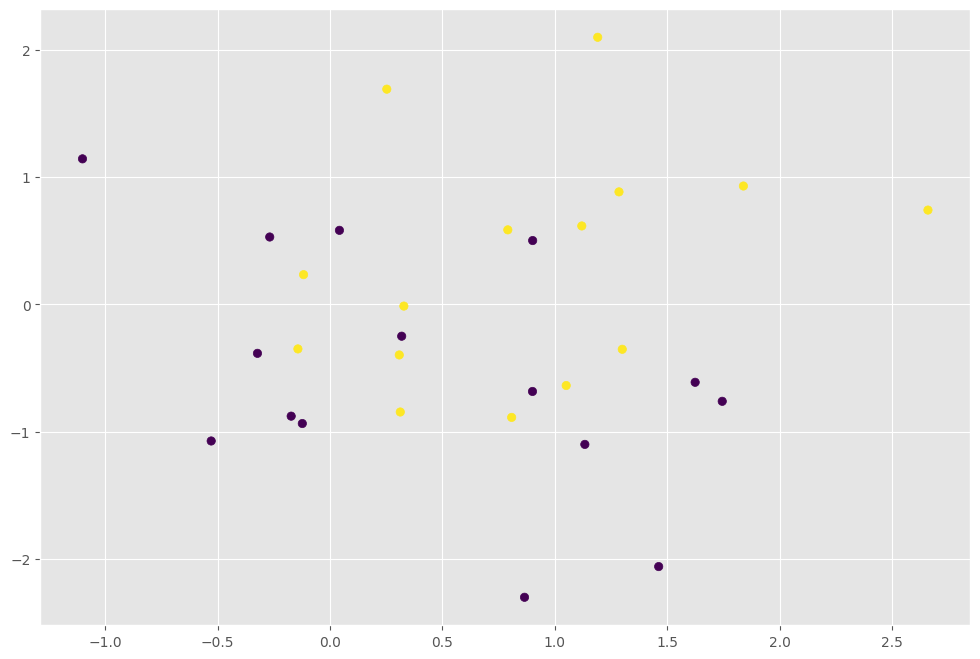

In [42]:
np.random.seed(1)
centers = [[0, 0], [1, 0]]
X, y = make_blobs(n_samples=30, centers=centers)
y[y == 0] = -1
plt.scatter(X[:,0], X[:,1],c=y)

print("Shape of X",X.shape)
print("Shape of y", y.shape)

## Tuning Hyperparameter $\gamma$ (gamma)

> The behavior of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.

> When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

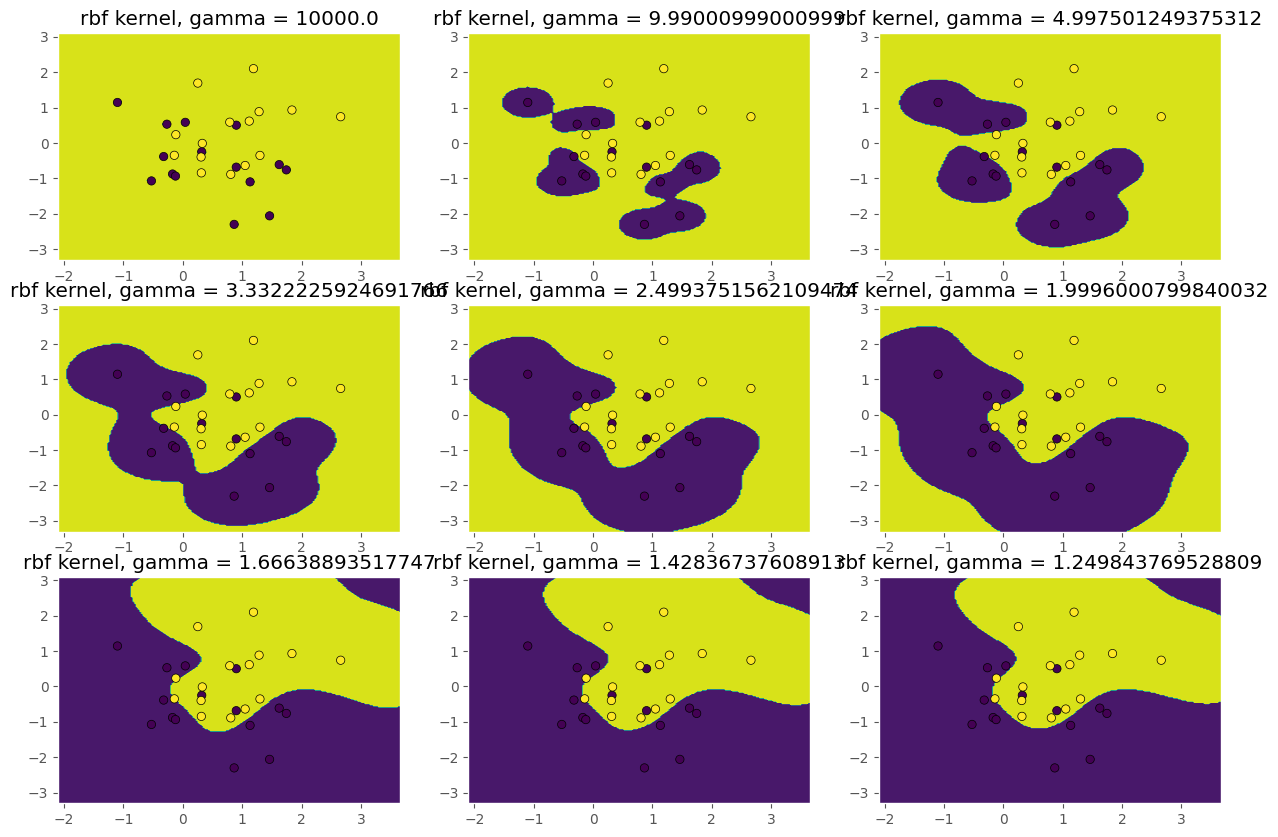

In [49]:
# visualize the decision boundary as gamma increases

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# We will let our classifier predict this set of values
x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T

# We will create the same model multiple times, but we will vary the sigma/gamma values for each one
sigma_vals = np.arange(0.0001, 0.9, 0.1)

plt.figure(figsize=(15,10))
plt_ctr = 1

for sigma in sigma_vals:

    # TODO : Create an SVM model with an RBF kernel, assign it a gamma value that is the inverse of the current sigma_vals.
    ### START CODE HERE ###
    gamma = 1.0 / sigma
    clf = svm.SVC(kernel="rbf", gamma=gamma)
    clf.fit(X, y)
    ### END CODE HERE ###
    
    Z = clf.predict(x_test)
    Z = Z.reshape(xx.shape)
    plt.subplot(3,3,plt_ctr)
    plt.contourf(xx, yy, Z)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')
    plt.xlim([x_min,x_max])
    plt.ylim([y_min,y_max])
    plt.title("rbf kernel, gamma = " + str(1/sigma))
    plt_ctr += 1

**Sanity Check:**

$\gamma = 1/\sigma$. As gamma increases, the standard deviation decreases. What you should see are blobs with small sizes (small standard deviation) when gamma is large. As gamma grows, then the blobs look like they are clustering together.

## Tuning Hyperparameter C


Recall: The dual optimization problem for support vector machines that we want to solve.<br />

$$
\begin{array}{lll}
    \max_\alpha & \quad \sum_{i=1}^N \alpha_i - \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N y_i y_j \alpha_i \alpha_j \langle x_i, x_j \rangle \\
    \text{such that} & \quad 0 \leq \alpha_i \leq C, \forall_i \\
    \quad & \quad \sum_{i=1}^N \alpha_i y_i = 0
\end{array}
$$
Here, we see that all $\alpha$'s must not only be more than or equal to 0, we bound it to $0 \leq \alpha_i \leq C$

from sklearn's documentation:

>The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

Here, you can think of C as the inverse of our previous regularization parameter $\lambda$, so $C = 1/\lambda$


$$
\begin{align}
 \alpha_i = 0 & \implies y_i (W^Tx_i + b) \geq 1 \\
 \alpha_i = C & \implies y_i (W^Tx_i + b) \leq 1 \\
 0 < \alpha_i < C & \implies y_i (W^Tx_i + b) = 1
\end{align}
$$

An increase in C will allow more support vectors.

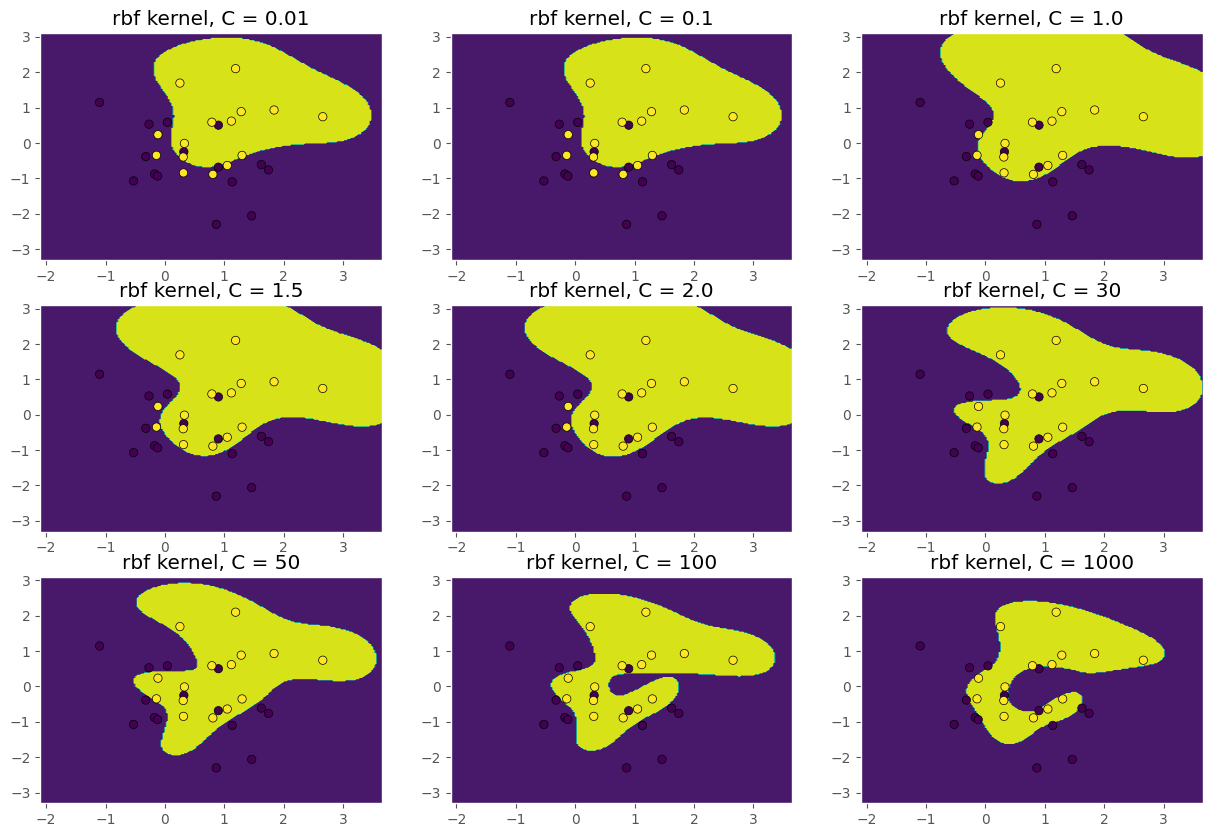

In [50]:
# visualize the decision boundary as C varies
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# This will be our test set
x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T

# Different values of C that we will try out
C_vals = [0.01 , 0.1, 1.0, 1.5, 2.0, 30, 50, 100, 1000]

plt.figure(figsize=(15,10))
plt_ctr = 1

for C in C_vals:
    
    # TODO : Create another SVM model with an RBF kernel. Here, vary the model to the current value of C
    ### START CODE HERE ###
    clf = svm.SVC(kernel="rbf", C=C, gamma=1.0)
    clf.fit(X, y)
    
    ### END CODE HERE ###
    
    Z = clf.predict(x_test)
    Z = Z.reshape(xx.shape)
    plt.subplot(3,3,plt_ctr)
    plt.contourf(xx, yy, Z)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')
    plt.xlim([x_min,x_max])
    plt.ylim([y_min,y_max])
    plt.title("rbf kernel, C = " + str(C))
    plt_ctr += 1

**Sanity Check:**

You should see a more complex model as you increase C. In the case of SVM with an RBF kernel, you should see more blobs created to section off the the classes (yellows from the violets).

## <center>fin</center>


<!-- DO NOT MODIFY OR DELETE THIS -->

<sup>made/compiled by daniel stanley tan & courtney anne ngo 🐰 & thomas james tiam-lee</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> danieltan07@gmail.com & courtneyngo@gmail.com & thomasjamestiamlee@gmail.com</sup><br>
<sup>please cc your instructor, too</sup>
<!-- DO NOT MODIFY OR DELETE THIS -->
